## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
from sklearn import linear_model, datasets
%matplotlib inline

## Output class dictionary

In [2]:
class_label = {
                1:'WALKING',
                2:'WALKING_UPSTAIRS',
                3:'WALKING_DOWNSTAIRS',
                4:'SITTING',
                5:'STANDING',
                6:'LAYING'
              };

## Loading Dataset (Training)

In [3]:
# Read the Feature Info
feature_info_file_name = "../dataset/features.txt";
feature_info_file = open(feature_info_file_name,'r');
feature_name = feature_info_file.read().splitlines();
print 'Number of Features : {}\n'.format(len(feature_name));

# Read the Training data
df_X_train = pd.read_csv('../dataset/train/X_train.txt',names=feature_name,header=None,delim_whitespace=True);
df_X_test  = pd.read_csv('../dataset/test/X_test.txt',names=feature_name,header=None,delim_whitespace=True);

# Read training outputs
df_y_train = pd.read_csv('../dataset/train/y_train.txt',names=['activity'],header=None);
df_y_test = pd.read_csv('../dataset/test/y_test.txt',names=['activity'],header=None);

Number of Features : 561



In [4]:
df_X_train.head()

tBodyAcc_mean_X  tBodyAcc_mean_Y  tBodyAcc_mean_Z  tBodyAcc_std_X  \
0         0.288585        -0.020294        -0.132905       -0.995279   
1         0.278419        -0.016411        -0.123520       -0.998245   
2         0.279653        -0.019467        -0.113462       -0.995380   
3         0.279174        -0.026201        -0.123283       -0.996091   
4         0.276629        -0.016570        -0.115362       -0.998139   

   tBodyAcc_std_Y  tBodyAcc_std_Z  tBodyAcc_mad_X  tBodyAcc_mad_Y  \
0       -0.983111       -0.913526       -0.995112       -0.983185   
1       -0.975300       -0.960322       -0.998807       -0.974914   
2       -0.967187       -0.978944       -0.996520       -0.963668   
3       -0.983403       -0.990675       -0.997099       -0.982750   
4       -0.980817       -0.990482       -0.998321       -0.979672   

   tBodyAcc_mad_Z  tBodyAcc_max_X         ...           \
0       -0.923527       -0.934724         ...            
1       -0.957686       -0.943068         ...            
2       -0.977469       -0.938692         ...            
3       -0.989302       -0.938692         ...            
4       -0.990441       -0.942469         ...            

   fBodyBodyGyroJerkMag_meanFreq  fBodyBodyGyroJerkMag_skewness  \
0                      -0.074323                      -0.298676   
1                       0.158075                      -0.595051   
2                       0.414503                      -0.390748   
3                       0.404573                      -0.117290   
4                       0.087753                      -0.351471   

   fBodyBodyGyroJerkMag_kurtosis  angle_tBodyAccMean_gravity_  \
0                      -0.710304                    -0.112754   
1                      -0.861499                     0.053477   
2                      -0.760104                    -0.118559   
3                      -0.482845                    -0.036788   
4                      -0.699205                     0.123320   

   angle_tBodyAccJerkMean_gravityMean  angle_tBodyGyroMean_gravityMean  \
0                            0.030400                        -0.464761   
1                           -0.007435                        -0.732626   
2                            0.177899                         0.100699   
3                           -0.012892                         0.640011   
4                            0.122542                         0.693578   

   angle_tBodyGyroJerkMean_gravityMean  angle_X_gravityMean  \
0                            -0.018446            -0.841247   
1                             0.703511            -0.844788   
2                             0.808529            -0.848933   
3                            -0.485366            -0.848649   
4                            -0.615971            -0.847865   

   angle_Y_gravityMean  angle_Z_gravityMean  
0             0.179941            -0.058627  
1             0.180289            -0.054317  
2             0.180637            -0.049118  
3             0.181935            -0.047663  
4             0.185151            -0.043892  

[5 rows x 561 columns]

## Visualizing a data set (IRIS)

## Visualizing HAR data set (first 4 features)

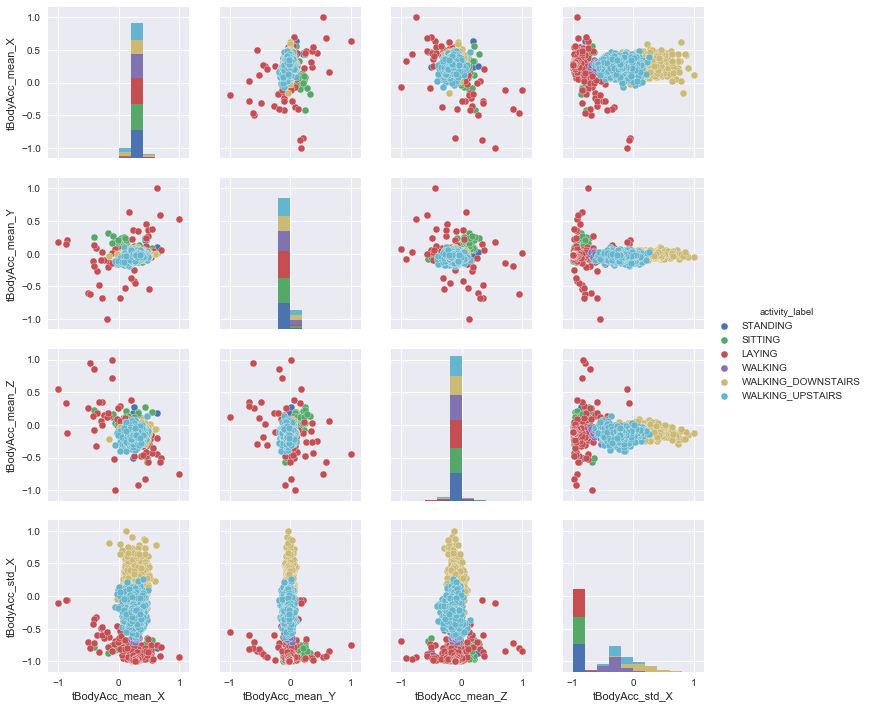

In [5]:
# merge the data set
df = df_X_train.copy(deep=True);
df['activity'] = df_y_train['activity'];
df['activity_label'] = df_y_train['activity'];
df['activity_label'].replace(class_label, inplace=True);

df_temp = df.iloc[:,0:4];
df_temp['activity_label'] = df['activity_label'];
sns.pairplot(df_temp,hue='activity_label');

## Find correlation between Features

In [6]:
corr = df.corr();
#plt.figure(figsize=(500,500));
#sns.heatmap(corr);

## Logistic regression (3 class IRIS classfication)

## Logistic Regression (all features , L2 regularization)
Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
Multinomial LR: https://en.wikipedia.org/wiki/Multinomial_logistic_regression

In [7]:
# Extract training features and outputs
X_train = df_X_train.values;
y_train = df_y_train.activity;
X_test = df_X_test.values;
y_test = df_y_test.activity;

In [8]:
# Fit Multinomial regression model
logreg = linear_model.LogisticRegression();
logreg.fit(X_train,y_train);
#np.set_printoptions(threshold=5);

In [9]:
# Predict outcomes for training and testing data
y_hat_train = logreg.predict(X_train);
y_hat_test = logreg.predict(X_test);

# Measure model accuracy on training and testing data
accuracy_train = 100*np.mean(y_hat_train==y_train);
accuracy_test  = 100*np.mean(y_hat_test==y_test);

print 'Accuracy on Training data is {}%'.format(accuracy_train);
print 'Accuracy on Testing data is {}%'.format(accuracy_test);

Accuracy on Training data is 94.6001088139%
Accuracy on Testing data is 93.7902952155%


## Logistic Regression (all features , L1 regularization)

In [10]:
# Fit Multinomial regression model
logreg_l1 = linear_model.LogisticRegression(penalty='l1');
logreg_l1.fit(X_train,y_train);

# Predict outcomes for training and testing data
y_hat_train = logreg_l1.predict(X_train);
y_hat_test = logreg_l1.predict(X_test);

# Measure model accuracy on training and testing data
accuracy_train = 100*np.mean(y_hat_train==y_train);
accuracy_test  = 100*np.mean(y_hat_test==y_test);

print 'Accuracy on Training data is {}%'.format(accuracy_train);
print 'Accuracy on Testing data is {}%'.format(accuracy_test);b

Accuracy on Training data is 99.972796518%
Accuracy on Testing data is 95.6565999321%


## Logistic regression (various value of lambda)(L2 regularization)

In [35]:
# Initialize regularization parameter
lmda = np.arange(-5,3,dtype=float);
lmda = np.power(10,lmda);
reg_param = np.power(lmda,-1);
accuracy_train_list_l2 = list();
accuracy_test_list_l2 = list();

for c in reg_param:
    # Model fitting
    logreg = linear_model.LogisticRegression(C=c);
    logreg.fit(X_train,y_train);
    
    # Output prediction
    y_hat_train = logreg.predict(X_train);
    y_hat_test = logreg.predict(X_test);
    
    # Performance measurement
    accuracy_train = 100*np.mean(y_hat_train==y_train);
    accuracy_test  = 100*np.mean(y_hat_test==y_test);
    
    accuracy_train_list_l2.append(accuracy_train);
    accuracy_test_list_l2.append(accuracy_test);


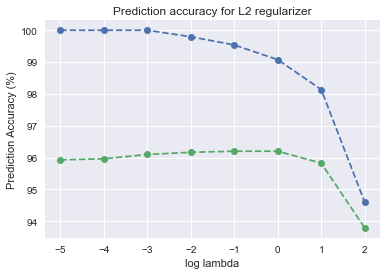

In [39]:
# Plot performance for various regularization parameters

plt.figure(1);
plt.plot(np.log10(lmda),accuracy_train_list_l2,'o--');
plt.plot(np.log10(lmda),accuracy_test_list_l2,'o--');
plt.xlabel('log lambda');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Prediction accuracy for L2 regularizer');
plt.show();

## Logistic regression (various value of lambda)(L2 regularization)

In [37]:
# Initialize regularization parameter
lmda = np.arange(-5,3,dtype=float);
lmda = np.power(10,lmda);
reg_param = np.power(lmda,-1);
accuracy_train_list_l1 = list();
accuracy_test_list_l1 = list();

for c in reg_param:
    # Model fitting
    logreg = linear_model.LogisticRegression(penalty='l1',C=c);
    logreg.fit(X_train,y_train);
    
    # Output prediction
    y_hat_train = logreg.predict(X_train);
    y_hat_test = logreg.predict(X_test);
    
    # Performance measurement
    accuracy_train = 100*np.mean(y_hat_train==y_train);
    accuracy_test  = 100*np.mean(y_hat_test==y_test);
    
    accuracy_train_list_l1.append(accuracy_train);
    accuracy_test_list_l1.append(accuracy_test);


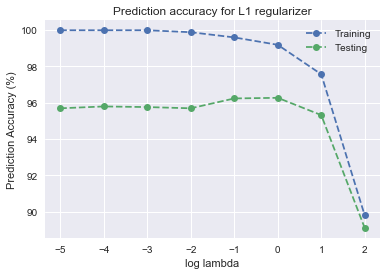

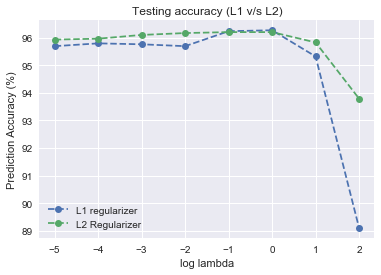

In [42]:
# Plot performance for various regularization parameters

plt.figure(1);
plt.plot(np.log10(lmda),accuracy_train_list_l1,'o--');
plt.plot(np.log10(lmda),accuracy_test_list_l1,'o--');
plt.xlabel('log lambda');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Prediction accuracy for L1 regularizer');
plt.legend(['Training','Testing']);
plt.show();

# Plot combined performance (L1 versus L2)
plt.figure();
plt.plot(np.log10(lmda),accuracy_test_list_l1,'o--');
plt.plot(np.log10(lmda),accuracy_test_list_l2,'o--');
plt.xlabel('log lambda');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Testing accuracy (L1 v/s L2)');
plt.legend(['L1 regularizer','L2 Regularizer']);
plt.show();